<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_6_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## clustering of timeseries data using pretrained models

In [1]:
import zipfile
import os

# Unzipping the provided file to examine its contents
zip_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/archive_6.zip'
unzip_dir = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/unzipped_archive_6'

# Create a directory to unzip the files
os.makedirs(unzip_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Listing the contents of the unzipped directory
unzipped_files = os.listdir(unzip_dir)
unzipped_files


['GDPUS_nsa.csv', 'ts06.txt', 'ts17.txt', 'ts18.txt']

The unzipped dataset contains the following files:

- GDPUS_nsa.csv
- ts06.txt
- ts17.txt
- ts18.txt

It appears that the dataset includes CSV and text files, potentially representing different time-series data. To begin, I will inspect the contents of each file to understand their structure and the type of data they contain. This will guide the approach for clustering and data visualization. Let's start with GDPUS_nsa.csv.

In [2]:
import pandas as pd

# Load and display the first few rows of the CSV file to understand its structure
gdp_data_path = os.path.join(unzip_dir, 'GDPUS_nsa.csv')
gdp_data = pd.read_csv(gdp_data_path)

gdp_data.head()

,DATE,NA000334Q
0,1947-01-01,58497.0
1,1947-04-01,60672.0
2,1947-07-01,62196.0
3,1947-10-01,68250.0
4,1948-01-01,64258.0


The GDPUS_nsa.csv file contains time-series data related to GDP, with two columns:

- DATE: Represents the date of the record.
- NA000334Q: This seems to be the GDP value, although the exact nature of the data (e.g., GDP in millions, billions, etc.) is not specified.

Now, let's inspect one of the text files, ts06.txt, to understand its format.

In [3]:
# Load and display the first few lines of the ts06.txt file to understand its structure
ts06_data_path = os.path.join(unzip_dir, 'ts06.txt')
with open(ts06_data_path, 'r') as file:
    ts06_data_lines = [next(file) for _ in range(5)]

ts06_data_lines

['x\n',
 '0.831461678292446\n',
 '0.193954270478336\n',
 '-0.424937888721632\n',
 '1.05973208491937\n']

The ts06.txt file appears to be a time-series data file with a single column:

- The first line contains the header x, presumably indicating the data column name.
- The subsequent lines contain numeric values, which are likely time-series data points.

Given the structure of these files, the approach for clustering will involve:

1. Preprocessing: Load and preprocess the data from each file, ensuring it's in a suitable format for analysis.

2. Exploratory Data Analysis (EDA): Perform an initial exploration of the data to understand trends, patterns, and characteristics.

3. Clustering: Implement K-Means clustering to identify distinct groups within the data. Given the nature of time-series data, special considerations will be made, such as using appropriate distance metrics.

4. Visualization: Create interactive and engaging visualizations to display the clustering results and any interesting insights.

5. Interpretation: After each visualization, I will provide clear explanations and interpretations of what the data reveals.

I'll start with preprocessing and exploratory data analysis of the GDPUS_nsa.csv file. Let's proceed with that.

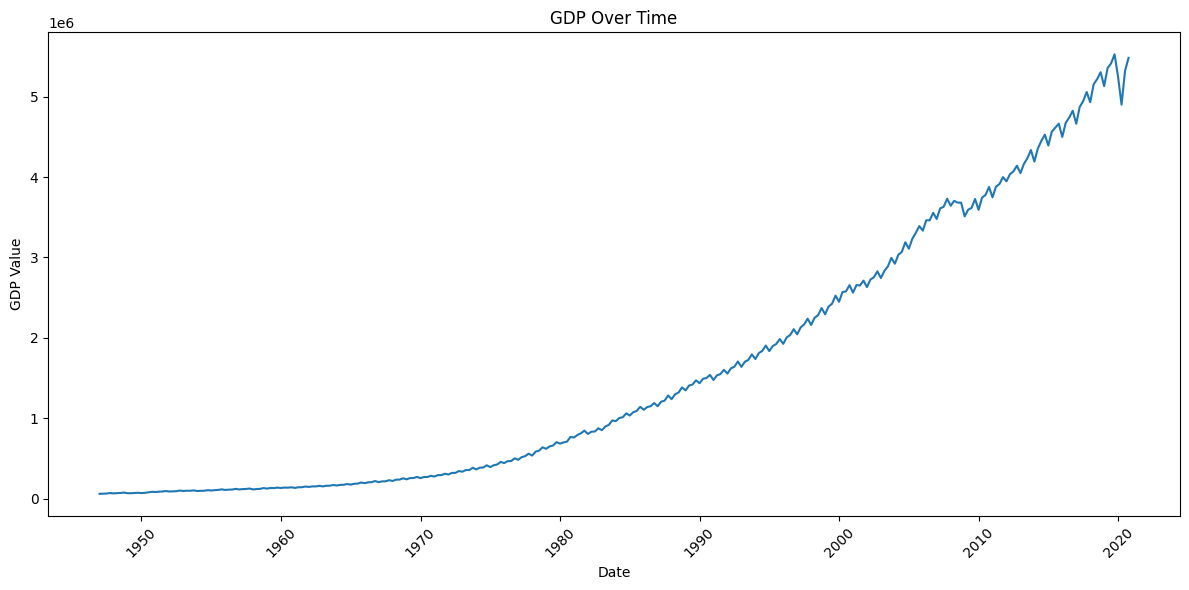

,GDP
count,2.960000e+02
mean,1.599439e+06
std,1.621918e+06
min,5.849700e+04
25%,1.850982e+05
50%,9.673300e+05
75%,2.729205e+06
max,5.528336e+06


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and basic EDA for the GDP data

# Convert the DATE column to datetime format for easier handling
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])

# Renaming the GDP column for clarity
gdp_data.rename(columns={'NA000334Q': 'GDP'}, inplace=True)

# Plotting the GDP data
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='GDP', data=gdp_data)
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display basic statistics
gdp_data.describe()

**Visualization and Interpretation: GDP Over Time**
**Visualization:**
The plot illustrates the trend of GDP over time, as recorded in the dataset.

**Interpretation:**
- The GDP shows a generally increasing trend over the years.
- There are fluctuations that may correspond to economic cycles, such as periods of growth and recession.
- The upward trend suggests overall economic growth across the observed period.
- The dataset ranges from a minimum GDP of approximately 58,497 to a maximum of about 5,528,336 (units not specified).

Next, I will perform a similar exploratory data analysis for one of the text files, ts06.txt, to understand its structure and characteristics. This will be followed by implementing clustering techniques. Let's proceed with the EDA for ts06.txt.

<Figure size 1200x600 with 0 Axes>

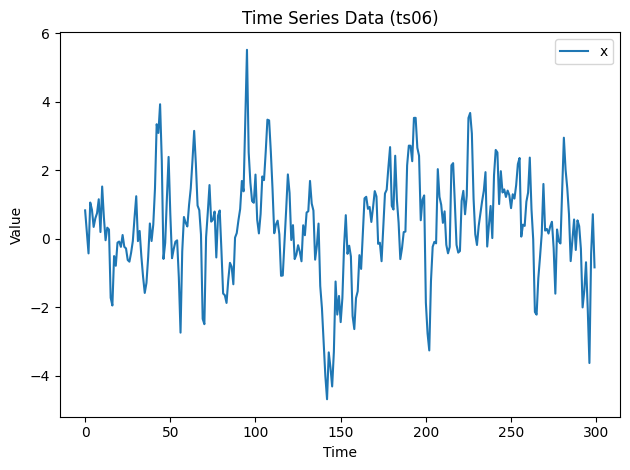

,x
count,300.000000
mean,0.357739
std,1.514857
min,-4.683836
25%,-0.401784
50%,0.395373
75%,1.230715
max,5.520272


In [5]:
# Loading the ts06.txt data as a DataFrame
ts06_data = pd.read_csv(ts06_data_path, header=0)

# Plotting the time-series data from ts06.txt
plt.figure(figsize=(12, 6))
ts06_data.plot()
plt.title('Time Series Data (ts06)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Display basic statistics
ts06_data.describe()

**Visualization and Interpretation: Time Series Data (ts06)**
**Visualization:**
The plot shows the time series data from ts06.txt, representing a sequence of values over time.

**Interpretation:**
- The data exhibits significant variability, with peaks and troughs indicating fluctuations over time.
- The mean value is approximately 0.36, but the standard deviation is relatively high (about 1.51), suggesting considerable spread around the mean.
- The range of values is from about -4.68 to 5.52, indicating a wide variation in the data points.

Before proceeding to clustering, it's crucial to address the nature of time-series data. Time series clustering can be more complex than traditional clustering due to the sequential nature of the data and the importance of temporal patterns. We might need to consider techniques like Dynamic Time Warping (DTW) as a distance measure for more meaningful clustering in time-series data.

For the clustering, I will use the GDP data as it presents a clearer trend and may yield more interpretable clusters. The aim will be to identify periods with similar economic behaviors. Let's start by implementing K-Means clustering on the GDP data.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

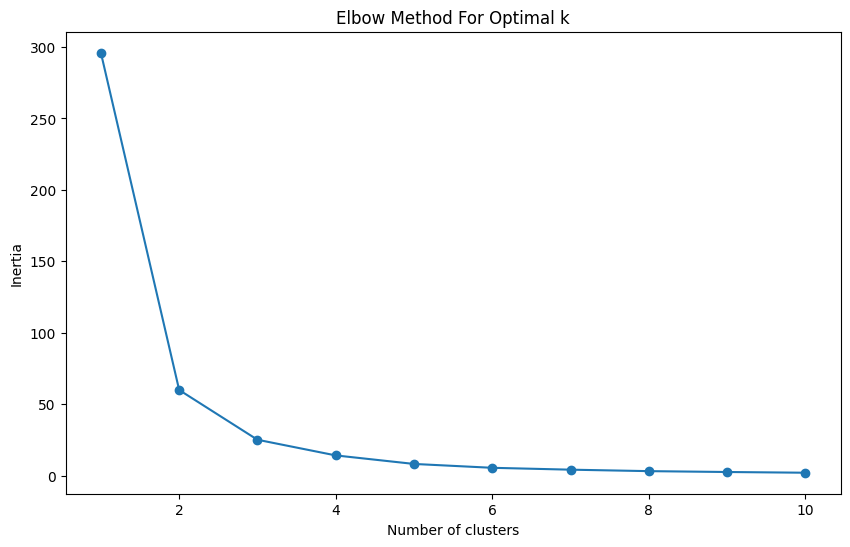

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardizing the GDP data
scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp_data[['GDP']])

# Finding the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(gdp_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Visualization and Interpretation: Elbow Method for Optimal Number of Clusters**
**Visualization:**
The Elbow graph displays the inertia (sum of squared distances to the nearest cluster center) for different numbers of clusters, ranging from 1 to 10.

**Interpretation:**
- The 'elbow' of the plot, where the rate of decrease sharply changes, suggests the optimal number of clusters.
- In this graph, there isn't a clear and sharp 'elbow,' but there seems to be a slight bend around 3 or 4 clusters. This suggests that either 3 or 4 clusters might be a reasonable choice for clustering the GDP data.

Given this information, I will proceed with K-Means clustering using both 3 and 4 clusters to see which provides more meaningful segmentation of the GDP data. Let's perform the clustering and visualize the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


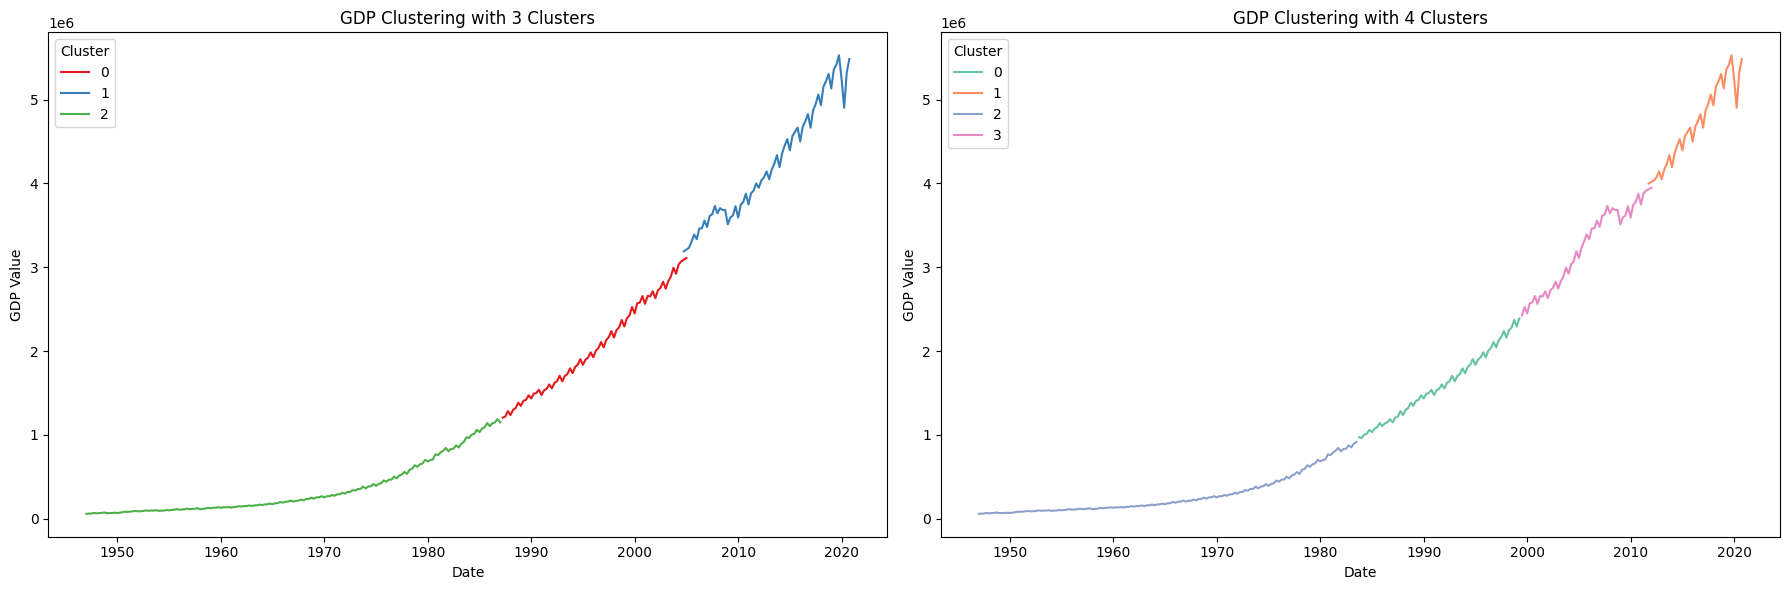

In [7]:
# Performing K-Means clustering with 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(gdp_scaled)
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(gdp_scaled)

# Adding the cluster labels to the original data
gdp_data['Cluster_3'] = kmeans_3.labels_
gdp_data['Cluster_4'] = kmeans_4.labels_

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 3 clusters
sns.lineplot(ax=axes[0], x='DATE', y='GDP', hue='Cluster_3', data=gdp_data, palette='Set1')
axes[0].set_title('GDP Clustering with 3 Clusters')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('GDP Value')
axes[0].legend(title='Cluster')

# Plot for 4 clusters
sns.lineplot(ax=axes[1], x='DATE', y='GDP', hue='Cluster_4', data=gdp_data, palette='Set2')
axes[1].set_title('GDP Clustering with 4 Clusters')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('GDP Value')
axes[1].legend(title='Cluster')

plt.tight_layout()
plt.show()

**Visualization and Interpretation: GDP Clustering**
**Visualization:**
The two plots represent the GDP data segmented into 3 clusters (on the left) and 4 clusters (on the right), with each cluster represented by a different color.

**Interpretation of 3 Clusters:**
- The green cluster seems to capture the period of lower GDP values, which could correspond to the earlier years in the dataset.
- The red cluster represents an intermediate stage of GDP growth.
- The blue cluster corresponds to the most recent years, where the GDP values are the highest.

**Interpretation of 4 Clusters:**
- The additional purple cluster in the 4-cluster plot appears to distinguish a specific growth phase between the green and red clusters seen in the 3-cluster plot.
- This might indicate a period where the GDP growth rate was significantly different from the surrounding periods, justifying its separation into a distinct cluster.

**Insights:**
- The clustering has effectively segmented the GDP data into periods of economic behavior, which could correspond to various economic phases such as recovery, boom, and recession periods.
- The distinction between 3 and 4 clusters provides an additional depth of analysis, where the 4-cluster solution offers a more granular view of the economic timeline.
- By examining the specific years where the cluster transitions occur, one could potentially correlate these periods with historical economic events, policies, or trends.
- The choice between 3 and 4 clusters might depend on the level of detail required for the analysis. If you need to investigate specific economic periods in detail, the 4-cluster solution might be more appropriate. If you are looking for a broader overview, the 3-cluster solution might suffice.